## Q2: Consistent plotting

(This is about python's decorators)

Write a decorator for the plots of all your papers. 

- Remember a decorator takes a function. 
- This function in turn should return a matplotlib figure object.
- Before the function is called, the decorator should initialize a matplotlib figure with the options that you like the most (fontsize, ticks, etc etc)
- After the figure it's done, the decorator should save it to pdf.

This is a great hack for your papers! You do this once and for all, and all plots in your paper will be beautifull, all with the same style/fontsize/etc. All you'll need to do is adding `@myplot` to the relevant plotting functions. 
    
The decorator that I use for my papers is available in my python module [skywalker](https://github.com/dgerosa/skywalker/blob/master/skywalker/skywalker.py#L31).  

In [6]:
import matplotlib.pyplot as plt
from functools import wraps

def Custom_plot(fname=None, dpi=120):
    def decorator(func):
        @wraps(func)
        def wrapper(*args, **kwargs):
            filename = fname if fname else func.__name__
            plt.rcParams.update({
                "font.family" : "sans-serif",
                "font.sans-serif" : "Arial",
                "figure.figsize": (6, 4),
                "font.size": 14,
                "axes.labelsize": 14,
                "axes.titlesize": 16,
                "xtick.labelsize": 12,
                "ytick.labelsize": 12,
                "axes.grid": True,
                "grid.alpha": 0.3,
                "savefig.bbox": "tight",
            })
            
            fig, ax = plt.subplots(dpi=dpi);
            result = func(*args, ax=ax, **kwargs);
            fig.savefig(f"{filename}.pdf");
            
            return fig;
        return wrapper
    return decorator


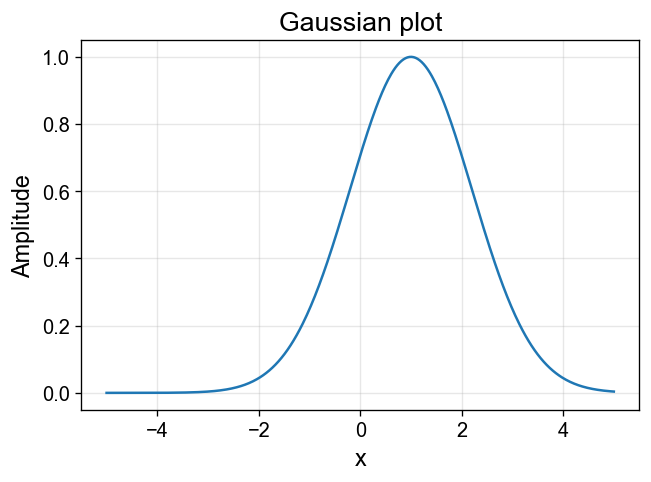

In [7]:
import numpy as np

@Custom_plot(fname="Figura1")
def plot_gaussian(ax = None):
    mu = 1
    sigma = 1.2
    x = np.linspace(-5, 5, 500)
    y = np.exp(-(x - mu)**2 / (2 * sigma**2))
    ax.plot(x, y)
    ax.set_title("Gaussian plot")
    ax.set_xlabel("x")
    ax.set_ylabel("Amplitude")

plot_gaussian();



## Q3: Scaling

(This is about multiprocessing)

The ["scaling"](https://hpc-wiki.info/hpc/Scaling) of a code refers to its performance of as a function of the number of cores adopted. 

- Define a computationally intensive task (something like an operation on two giant arrays with >1e7 numbers or, even better!, pick somethinbg from your research). 
- Make sure it's embarrassingly parallel. 
- Implement a parallelization strategy using multiprocessing. 
- Plot the time the code takes as a function of the number of cores.
- Figure out the number of cores in your CPU and make sure the plot extends both below and above this number.
- Interpret the resulting features. 
- A perfect scaling results in straight line (linear dependency). How perfect is your scaling?

### Important
Numpy has some inner, semi-automatic parallelization functionalities. Some, but not all, numpy functions detect the number of CPUs in your machine and make good use of them. That's great for most applications, but when performing a scaling study you want to control the parallelization yourself and disable what's done internally by numpy. The following forces numpy to use a single core. 

#### Solution of the exercise in the last cell

In [ ]:
import os
import time
import random
import numpy as np
import matplotlib.pyplot as plt
import multiprocessing, pathos.multiprocessing
from tqdm import tqdm

#np.__config__.show()
os.environ['OPENBLAS_NUM_THREADS'] = '1'
os.environ['MKL_NUM_THREADS'] = '1'

N_core = multiprocessing.cpu_count()

def MC_sim(_):
    import numpy as np
    #W, L, Vg, Vd = params
    W = 10e-6;
    L = 180e-9;
    Vg = 0.7;
    Vd = 1;
    
    Cox = np.random.normal(8.7e-15, 2e-15)
    uox = np.random.normal(1.7e-15, 0.3e-15)
    Vth = np.random.normal(-0.8, 0.2)
    lam = np.random.normal(1/20, 1/50)
    return 0.5 * (W/L) * Cox * uox * (Vg - Vth)**2 * (1 + lam * Vd)


#MAIN
if __name__ == "__main__":
    N_MC = int(1e5)
    
    V_N_core = np.arange(1, N_core + 1)
    code_time = np.zeros(N_core)
    
    #W = np.linspace(0, 10e-6, N_MC)
    #L = np.linspace(0, 180e-9, N_MC)
    #Vd = np.linspace(0, 1, N_MC)
    #Vg = np.linspace(0, 0.5, N_MC)
    
    #params = list(zip(W, L, Vg, Vd))
    
    for N_core_in_use in range(4, N_core+1):

        print(f"Ncore in use: {N_core_in_use}")
        parmap = pathos.multiprocessing.ProcessingPool(N_core_in_use).imap
        start = time.time()
        Ids = list(tqdm(parmap(MC_sim, range(N_MC)), total=N_MC))
        end = time.time()
        
        code_time[N_core_in_use - 1] = end - start
        
        fig = plt.figure(dpi = 120)
        plt.hist(Ids, bins=100)  
        plt.xlabel("Ids [A]")
        plt.ylabel("Freq")
        plt.title(f"Istogramma di Ids con {N_core_in_use} core")
        plt.show()

Ncore in use: 4


 20%|██████████████▉                                                          | 20408/100000 [00:19<01:16, 1044.87it/s]

## V 0
WARNING: problem with zombie workers

Using 1 cores


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 69.97it/s]


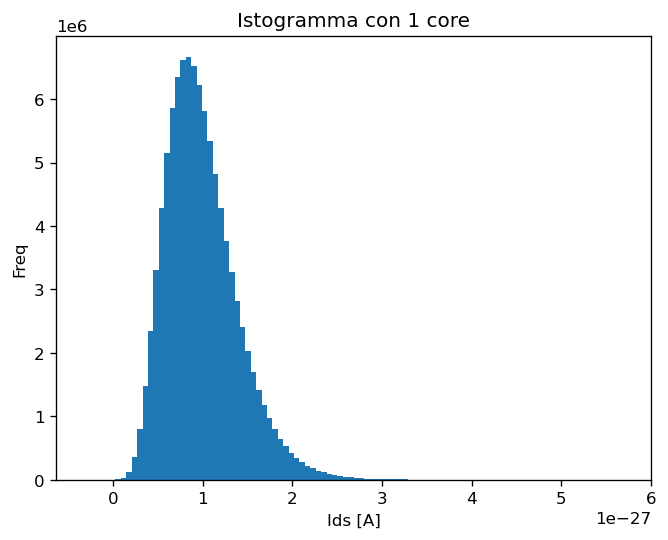

Using 2 cores


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 102.18it/s]


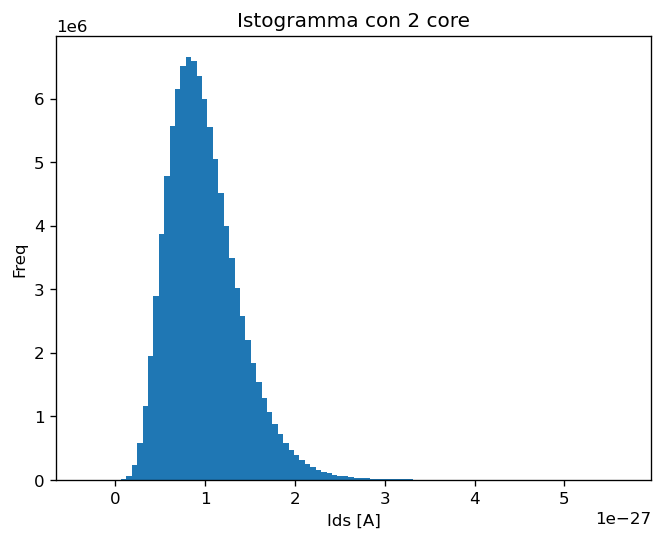

Using 3 cores


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 155.10it/s]


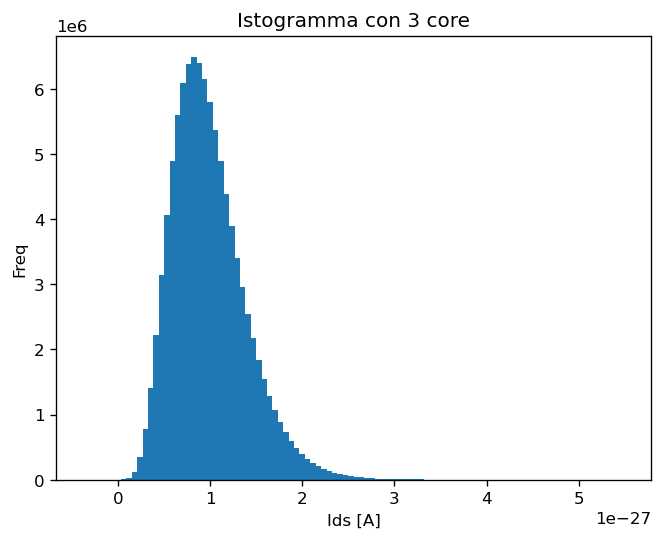

Using 4 cores


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 177.99it/s]


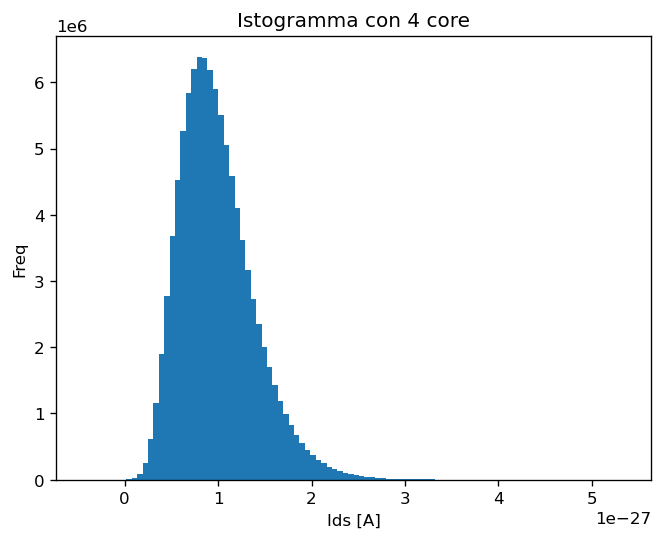

Using 5 cores


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 164.21it/s]


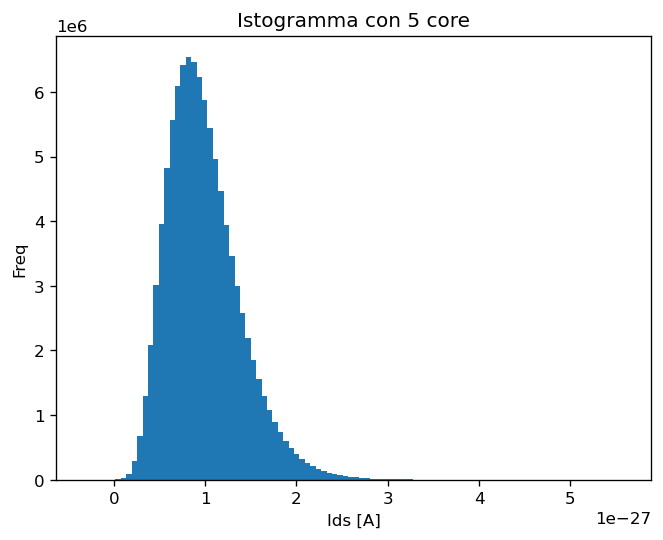

Using 6 cores


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 179.98it/s]


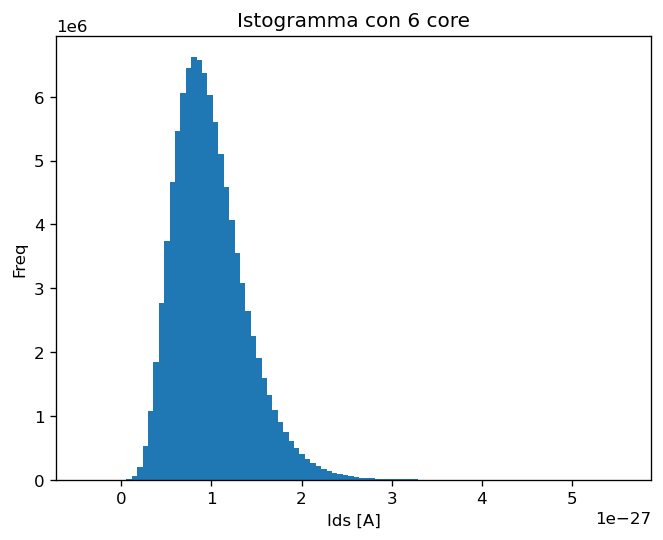

Using 7 cores


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 183.72it/s]


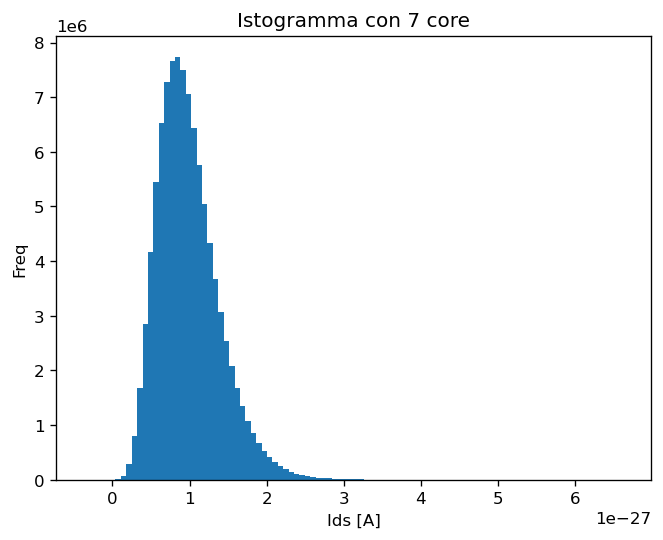

Using 8 cores


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 189.33it/s]


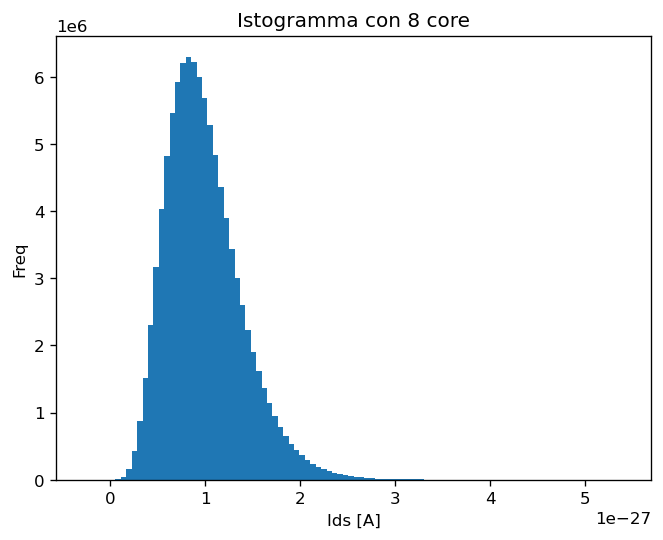

Tempi per numero di core:
[14.30431533  9.88977504  6.53666472  5.73686838  6.21879721  5.68341994
  5.63358545  5.43821859]


In [1]:
import os
import time
import numpy as np
import matplotlib.pyplot as plt
import multiprocessing, pathos.multiprocessing
from tqdm import tqdm

os.environ['OPENBLAS_NUM_THREADS'] = '1'
os.environ['MKL_NUM_THREADS'] = '1'

def MC_sim_batch(batch_size):
    import numpy as np
    W = 10e-6
    L = 180e-9
    Vg = 0.7
    Vd = 1

    Cox = np.random.normal(8.7e-15, 2e-15, batch_size)
    uox = np.random.normal(1.7e-15, 0.3e-15, batch_size)
    Vth = np.random.normal(-0.8, 0.2, batch_size)
    lam = np.random.normal(1/20, 1/50, batch_size)

    Ids = 0.5 * (W/L) * Cox * uox * (Vg - Vth)**2 * (1 + lam * Vd)
    return Ids

if __name__ == "__main__":
    
    N_MC = int(1e8)
    batch = 100_000                # numero di simulazioni per batch
    N_core = multiprocessing.cpu_count()

    batch_list = [batch] * (N_MC // batch)

    code_time = np.zeros(N_core)

    for N_core_in_use in range(1, N_core+1):

        print(f"Using {N_core_in_use} cores")

        pool = pathos.multiprocessing.ProcessingPool(N_core_in_use)

        start = time.time()
        results = list(tqdm(pool.imap(MC_sim_batch, batch_list), total=len(batch_list)))
        end = time.time()

        pool.close()
        pool.join()

        Ids = np.concatenate(results)

        code_time[N_core_in_use - 1] = end - start

        plt.figure(dpi=120)
        plt.hist(Ids, bins=100)
        plt.title(f"Istogramma con {N_core_in_use} core")
        plt.xlabel("Ids [A]")
        plt.ylabel("Freq")
        plt.show()

    print("Tempi per numero di core:")
    print(code_time)

## V1
Warning: it seems like pathos is not able to pass the library (np in this case) to each worker in a proper way. To be onest it seems strange to me, since also Professor Gerosa runned the code correctly without importing the library, but it works and its 1000x times faster than before so i'll just trust the wizzard in my pc

Using 1 cores


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 66.71it/s]


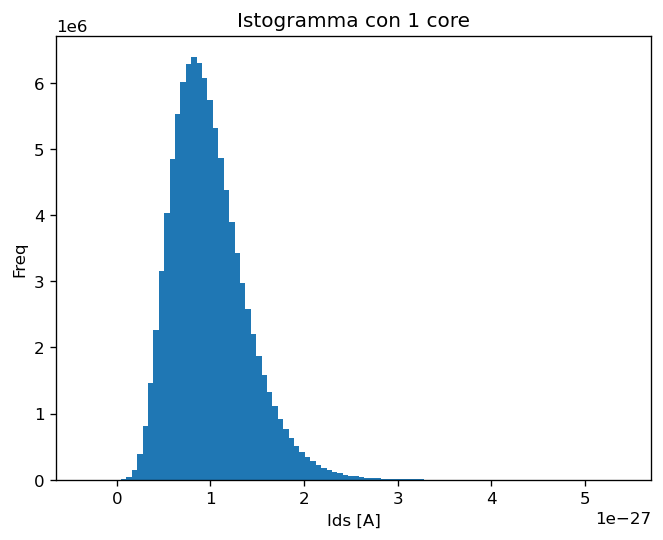

Using 2 cores


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 114.22it/s]


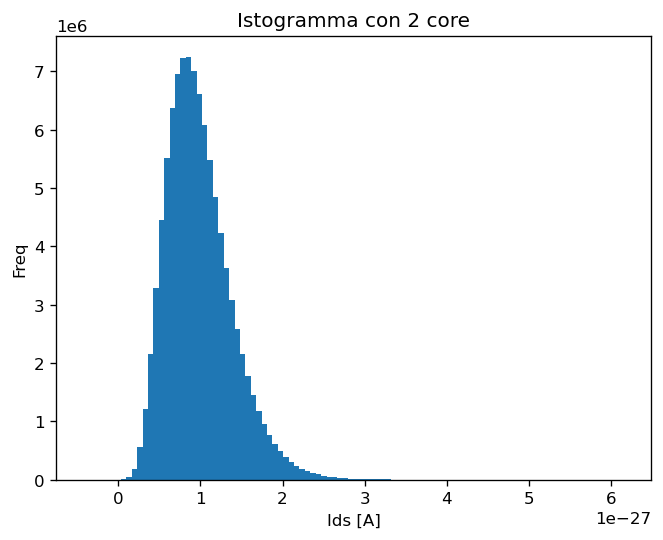

Using 3 cores


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 164.53it/s]


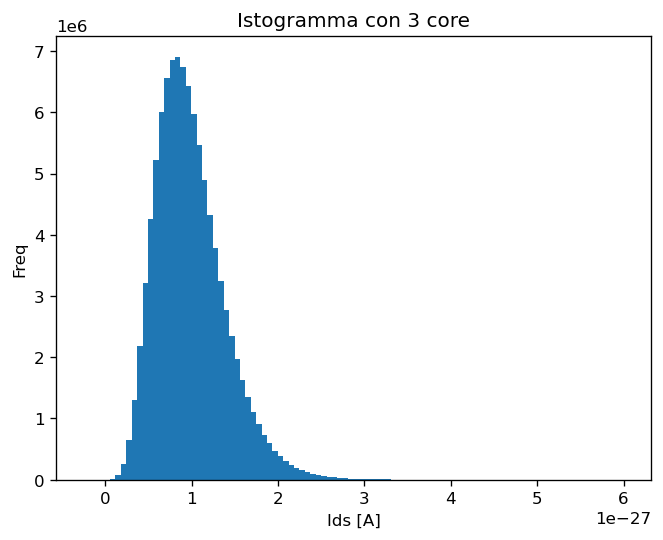

Using 4 cores


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 173.54it/s]


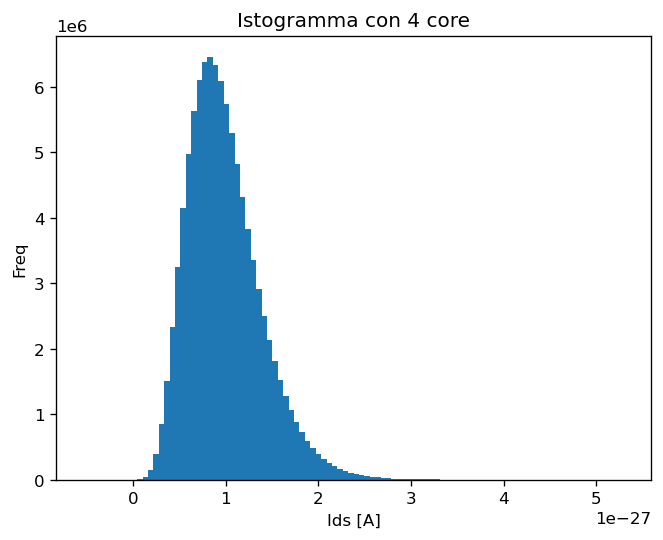

Using 5 cores


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 176.67it/s]


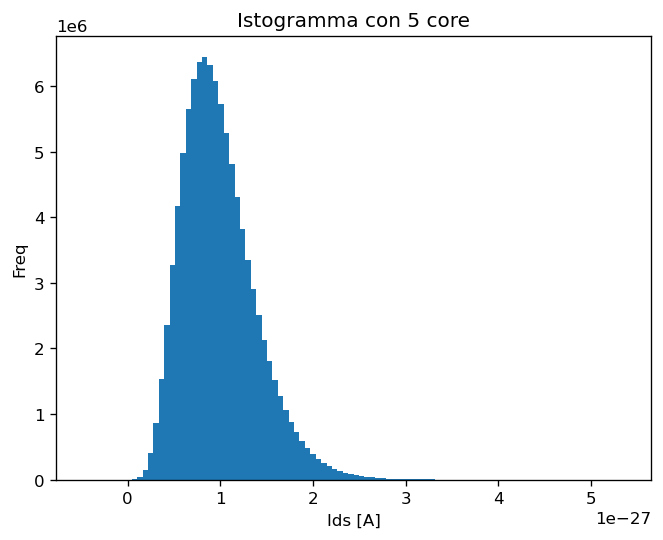

Using 6 cores


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 176.59it/s]


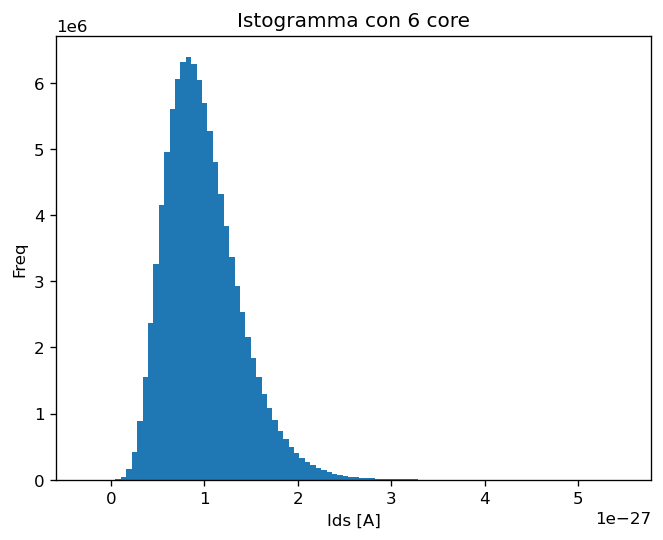

Using 7 cores


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 181.90it/s]


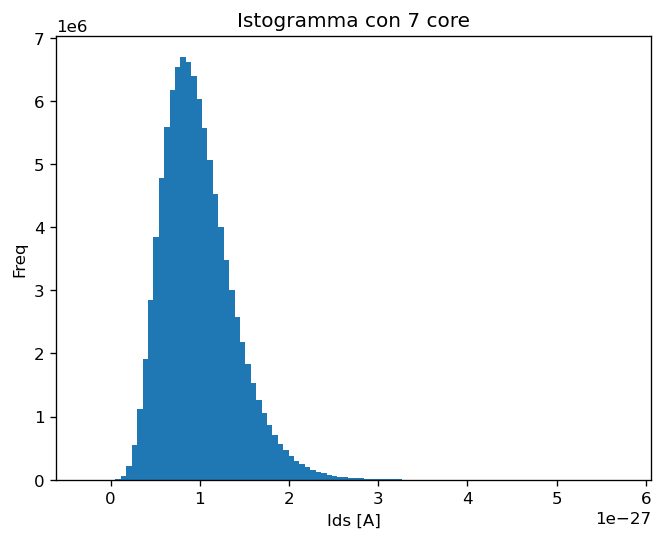

Using 8 cores


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 176.30it/s]


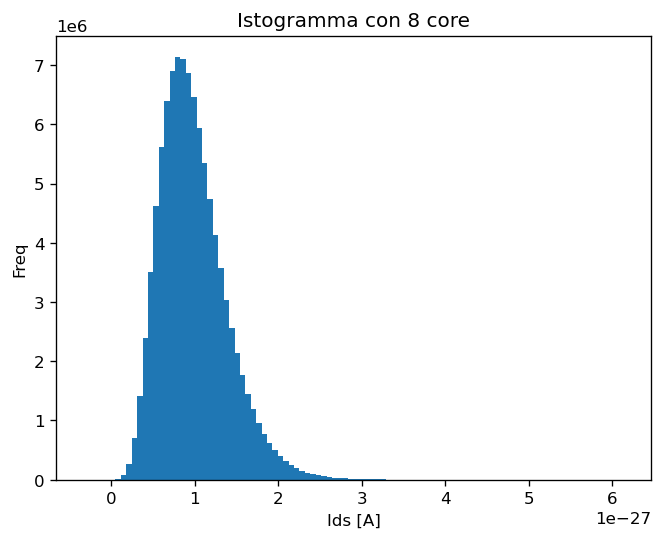

Tempi per numero di core:
[15.09560752  8.8557303   6.19667244  5.91203356  5.78657913  5.79291272
  5.62879205  5.85840154]


In [5]:
import os
import time
import numpy as np
import matplotlib.pyplot as plt
import multiprocessing, pathos.multiprocessing
from tqdm import tqdm

os.environ['OPENBLAS_NUM_THREADS'] = '1'
os.environ['MKL_NUM_THREADS'] = '1'

def MC_sim_batch(batch_size):
    import numpy as np
    W = 10e-6
    L = 180e-9
    Vg = 0.7
    Vd = 1

    Cox = np.random.normal(8.7e-15, 2e-15, batch_size)
    uox = np.random.normal(1.7e-15, 0.3e-15, batch_size)
    Vth = np.random.normal(-0.8, 0.2, batch_size)
    lam = np.random.normal(1/20, 1/50, batch_size)

    Ids = 0.5 * (W/L) * Cox * uox * (Vg - Vth)**2 * (1 + lam * Vd)
    return Ids

if __name__ == "__main__":
    
    N_MC = int(1e8)
    batch = 100_000                
    N_core = multiprocessing.cpu_count()

    batch_list = [batch] * (N_MC // batch)

    code_time = np.zeros(N_core)

    for N_core_in_use in range(1, N_core+1):

        print(f"Using {N_core_in_use} cores")
    
        multiprocessing.freeze_support()
        pool = pathos.multiprocessing.ProcessingPool(N_core_in_use)
    
        start = time.time()
        results = list(tqdm(pool.imap(MC_sim_batch, batch_list), total=len(batch_list)))
        end = time.time()
    
        pool.close()     
        pool.join()      
        pool.terminate() # kills zombie 
        pool.restart()   
        del pool        
    
        Ids = np.concatenate(results)
    
        code_time[N_core_in_use - 1] = end - start
    
        plt.figure(dpi=120)
        plt.hist(Ids, bins=100)
        plt.title(f"Istogramma con {N_core_in_use} core")
        plt.xlabel("Ids [A]")
        plt.ylabel("Freq")
        plt.show()


    print("Tempi per numero di core:")
    print(code_time)

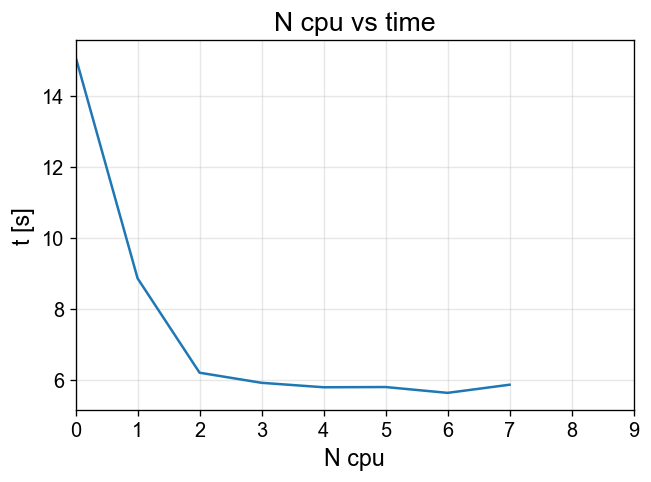

In [9]:
@Custom_plot(fname="Figura2")

def plot_time(y, ax = None):
    ax.plot(y)
    ax.set_xlim(0, multiprocessing.cpu_count() + 1 )
    ax.set_title("N cpu vs time")
    ax.set_xlabel("N cpu")
    ax.set_ylabel("t [s]")

plot_time(code_time);

4 cores cpu with 8 logic cpu, i'm okay with the plateu for Ncores >= 4